In [29]:
#importing the libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['figure.figsize']=(20,10)

In [30]:
#reading the csv file
df=pd.read_csv('2022 Shopify Internship Data.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [31]:
#checking for nulls and data type
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB
None
order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64


After the first exploration of the data, there are no null values and there are 7 columns. 
Some columns are categorical and others are quantitative. The next step is to plot out the latter and see the ouliers in the data.I will also remove the order id column from this box plot. I chose a box plot because it is easier to see the outliers at a glance. However, outliers are not always a bad thing. It all depends on the context of why we are analyzing the data. 

For this analysis, outliers can skew the average order value and make it very small or very large because the mean of a data set is very sensitive to the very large or very small numbers.

Text(0.5, 1.0, 'Box plot showing the dataset')

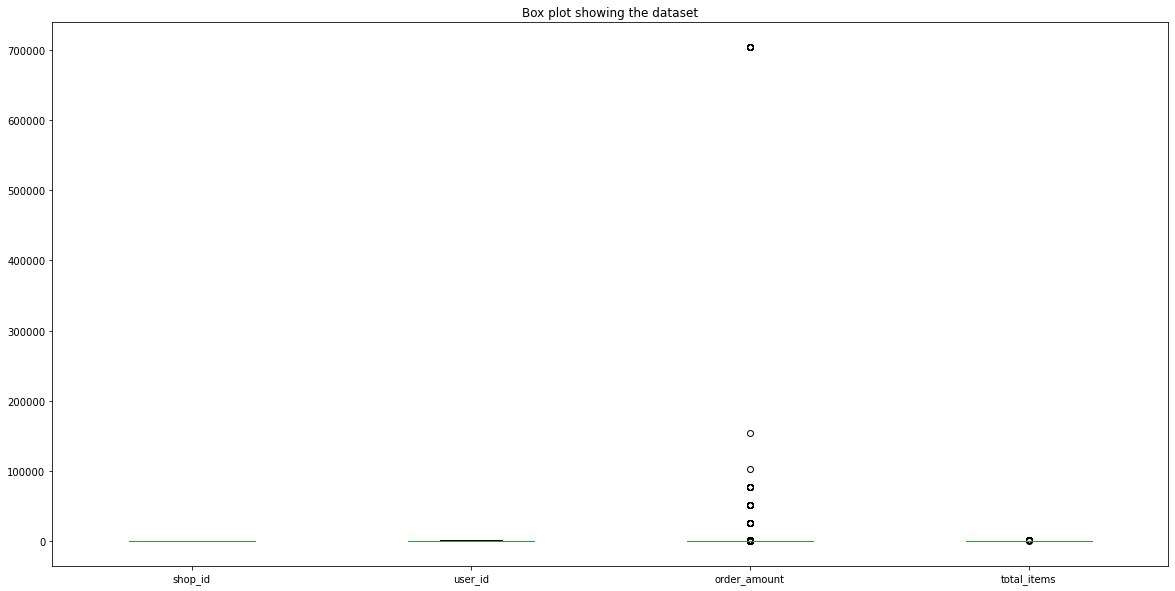

In [32]:
#visualizing the data set
col1=df.select_dtypes(np.number)
col1= col1.drop(['order_id'], axis=1)
col1.plot.box()
plt.title("Box plot showing the dataset")


Wow, looking at this box plot, there is a very large order_amount for some of the orders. 
This means that the average order value including these order_ids will be very large.
For a more accurate value for the average order value, we need to consider removing the outliers. 

The first step is to figure out what percent of the order_amount o is in the $70,000 range. From the description of this data set, these stores sell sneakers that are pretty affordable so the reason why the order_amount would be very high is if the total number of items in an order is high.

Before that, I want to understand where the '$3145.13' comes from that was included in the description of this exercise.

# Q1: Where does the 3145.13 come from?

In [33]:
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

The 3145.13 comes from the mean of "order_amount" column. This amount is very high so there might be some outliers.

We are going to understand the data set more by viewing the total number of items for different orders. 

Text(0, 0.5, 'Number of orders')

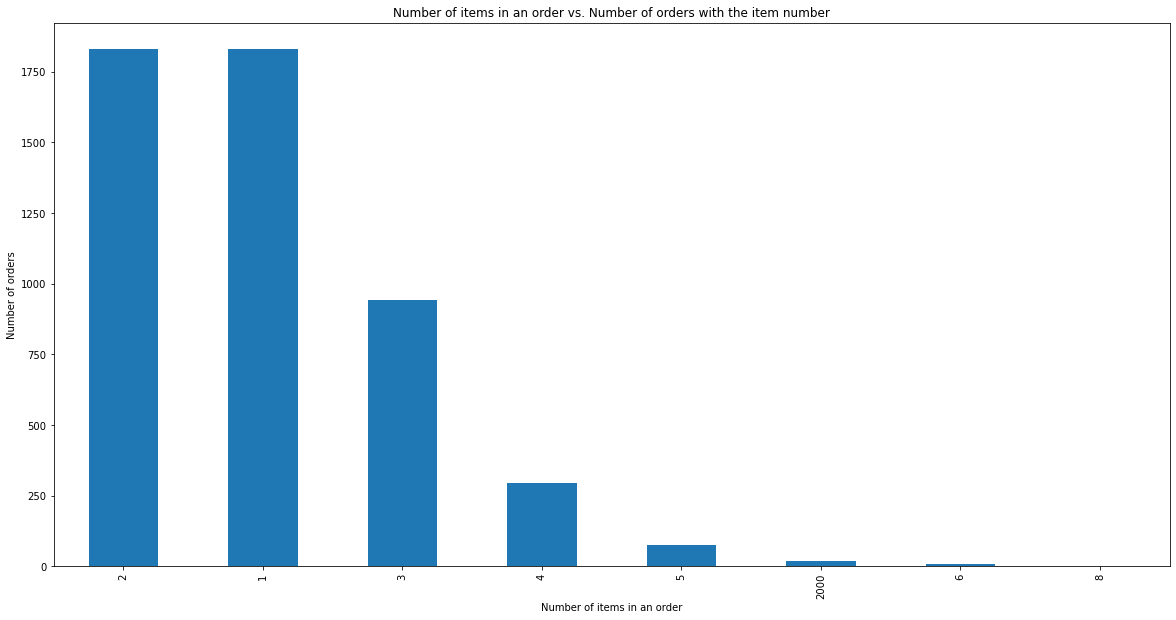

In [34]:
df["total_items"].value_counts().plot(kind='bar')
plt.title("Number of items in an order vs. Number of orders with the item number")
plt.xlabel("Number of items in an order")
plt.ylabel("Number of orders")

Let's confirm if the high order_amount(70,400) corresponds to the order_ids with 2000 items

In [35]:
condition1= df['total_items']== 2000
High_orderamount=df[condition1]
print(High_orderamount.sort_values(by='order_amount', ascending=False))
High_orderamountpercent=len(High_orderamount)/len(df) *100
print("the percentage of data that has the maximum high order amount (704000) and 2000 orders is")
print ( High_orderamountpercent)


      order_id  shop_id  user_id  order_amount  total_items payment_method  \
15          16       42      607        704000         2000    credit_card   
2297      2298       42      607        704000         2000    credit_card   
4868      4869       42      607        704000         2000    credit_card   
4646      4647       42      607        704000         2000    credit_card   
4056      4057       42      607        704000         2000    credit_card   
3332      3333       42      607        704000         2000    credit_card   
2969      2970       42      607        704000         2000    credit_card   
2835      2836       42      607        704000         2000    credit_card   
2153      2154       42      607        704000         2000    credit_card   
60          61       42      607        704000         2000    credit_card   
1602      1603       42      607        704000         2000    credit_card   
1562      1563       42      607        704000         2000    c

A better way to calculate the average order value is to consider two things. 
1. The unit price of sneakers in each shop
2. The maximum/unusual no of orders in each store.

The unit price plays an important role here because, to get better insights and make a well informed decision about the average order value, it is important to confirm if all the stores are selling in the same price range. Some of these decisions could be tailored towards shippingor marketing templates for brands. This can also be useful if you are looking to roll out any new shopify features that could impact different types of brands (whole sale vs retail brands, for instance.) 

The second one is the most important because a high no of items will increase the order_amount. From the initial exploratory analysis, the orders that have 70,400 order_amount have to be analyzed differently.

For the record, I do not think that they should be removed from the analysis because this data could bring valuable insights. However, we can use the MECE (mutually Exclusive And Collectively Exhaustive) method to get actionable insights from this data set.



Text(0, 0.5, 'Unit Price')

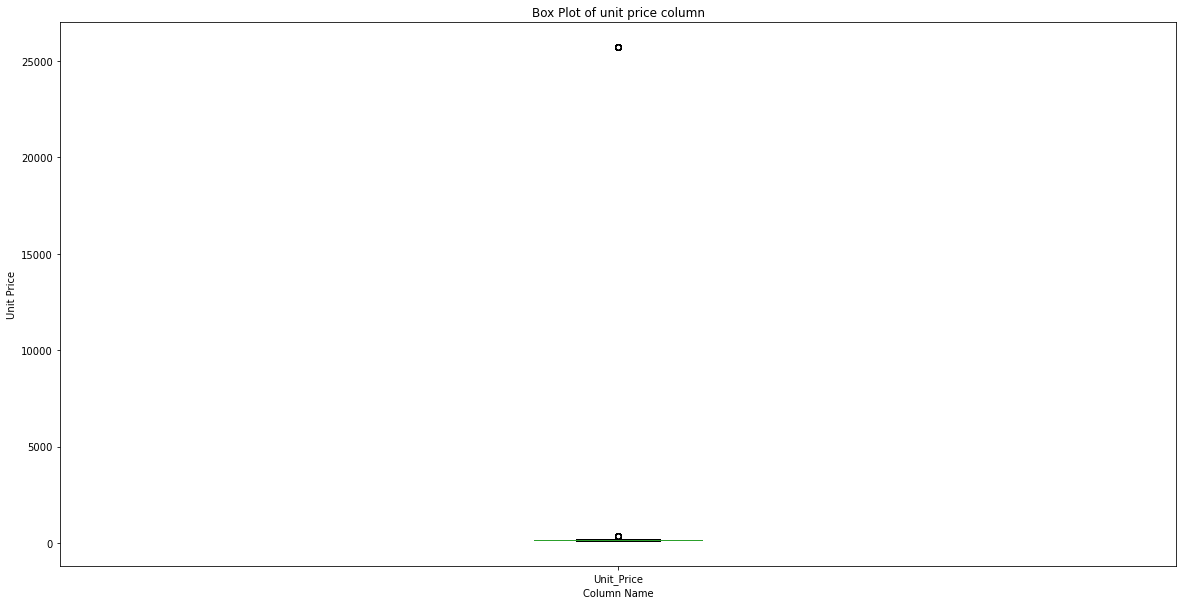

In [36]:
df['Unit_Price']=df['order_amount']/df['total_items']
df['Unit_Price'].plot.box()
plt.title("Box Plot of unit price column")
plt.xlabel("Column Name")
plt.ylabel("Unit Price")



(array([4954.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          46.]),
 array([   90. ,  2653.5,  5217. ,  7780.5, 10344. , 12907.5, 15471. ,
        18034.5, 20598. , 23161.5, 25725. ]),
 <BarContainer object of 10 artists>)

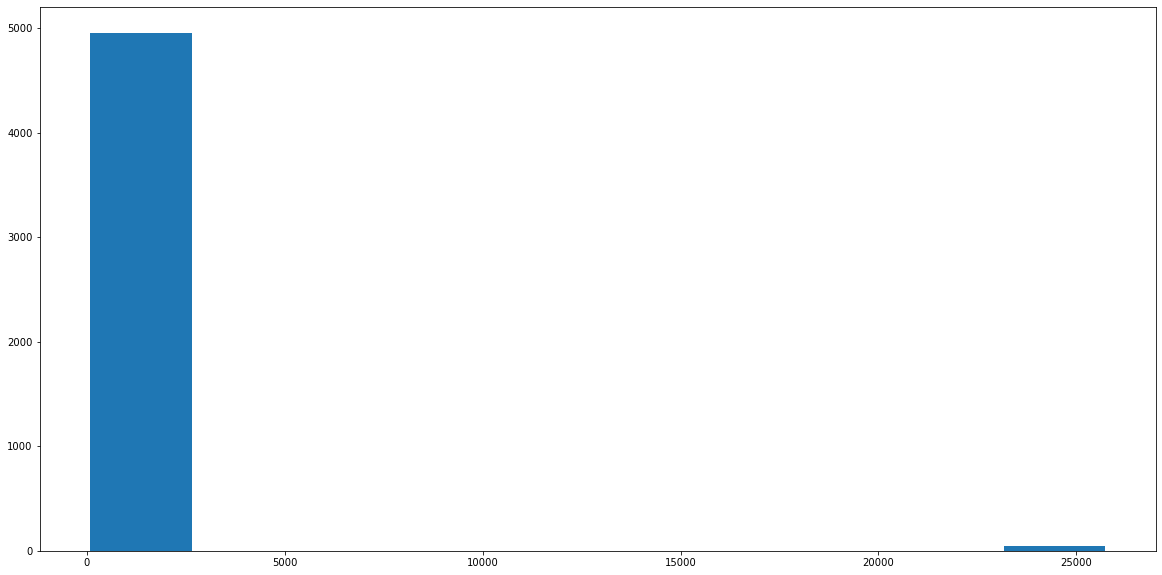

In [37]:
plt.hist(x=df['Unit_Price'], density=False)


In [38]:
df_unitprice=df.groupby(['Unit_Price','shop_id']).size()
df_unitprice

Unit_Price  shop_id
90.0        92         42
94.0        2          55
101.0       32         42
111.0       100        40
112.0       7          56
                       ..
195.0       99         54
196.0       89         61
201.0       12         53
352.0       42         51
25725.0     78         46
Length: 100, dtype: int64

you can see that there is one unit price that is completely different from the rest in both graphs.
25725.0 is a very high unit price for 46 orders in shop 78 and this value will skew the average order value as well because 
total revenue is unit price x no of items. It is also interesting that the store 78 is not the same store with the highest total amount per order.

In [39]:
df['Unit_Price'].describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: Unit_Price, dtype: float64

The standard deviation is very high. Also, the difference between the minimum and maximum values is large.

Using the IQR , we can continue the analysis of the new data set and reduce the standard deviation. 
We see that store 46 and 78 are different from other stores
because of the high unit price and the large volume of orders. 

In [40]:
condition1=df['Unit_Price'] != 25725
condition2=df['order_amount']!=704000
df_1=df[condition1 & condition2]
print("the percentage of data left after removing the shops with high unit price and high number of items is")
print(len(df_1)/len(df)*100)

the percentage of data left after removing the shops with high unit price and high number of items is
98.74000000000001


In [41]:
df_1['Unit_Price'].describe()

count    4937.000000
mean      151.788536
std        29.034215
min        90.000000
25%       132.000000
50%       153.000000
75%       166.000000
max       352.000000
Name: Unit_Price, dtype: float64

In [42]:
df_1['order_amount'].describe()

count    4937.000000
mean      302.580514
std       160.804912
min        90.000000
25%       163.000000
50%       284.000000
75%       387.000000
max      1760.000000
Name: order_amount, dtype: float64

Text(0, 0.5, 'Value')

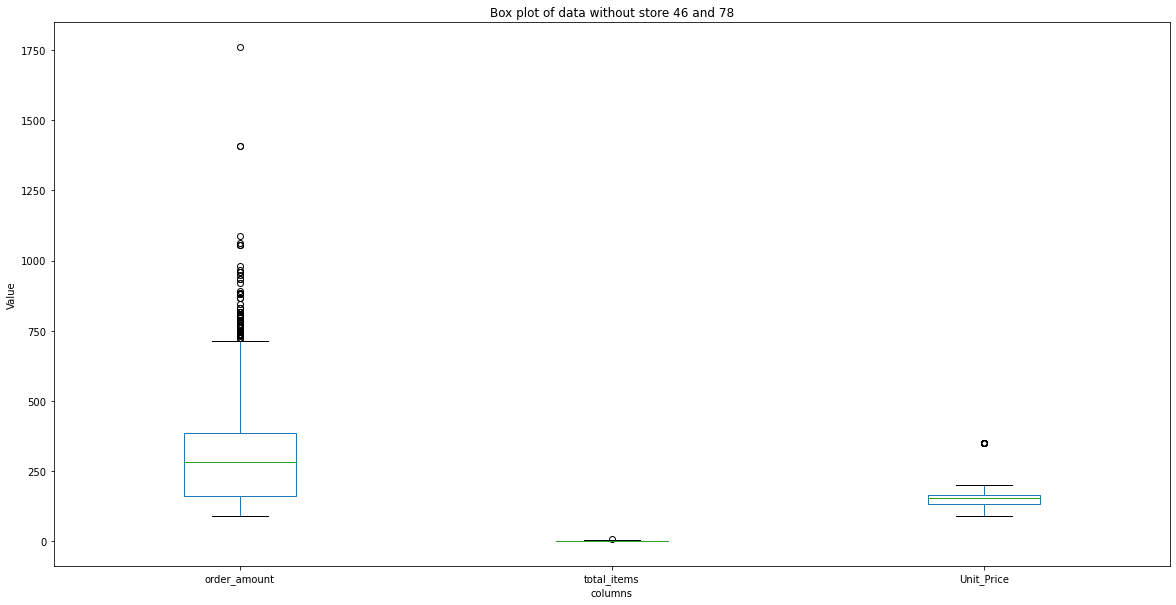

In [43]:
col2=df_1.select_dtypes(np.number).drop(['order_id','shop_id','user_id'],axis=1)
col2.plot.box()
plt.title("Box plot of data without store 46 and 78")
plt.xlabel("columns")
plt.ylabel("Value")

We can still see some outliers in the order amount, unit_price and total items. 
The next step is to identify and analyze if those outliers need to be removed.

In [25]:
Q1 = col2.quantile(0.25)
Q3 = col2.quantile(0.75)
IQR = Q3 -Q1
low_boundary= Q1 - 1.5*IQR
high_boundary= Q3 + 1.5*IQR
no_outliers= col2[~((col2 >high_boundary)|(col2<low_boundary)).any(axis=1)]
print("low boundary:\n"  +  str(low_boundary)+"\n")
print("high_boundary:\n"  + str(high_boundary)+ "\n")
print("Q3:\n" + str(Q3)+ "\n")
print("Q1:\n" +str(Q1)+ "\n")
print("IQR:\n" +str(IQR)+ "\n")
no_outliers.describe()

low boundary:
order_amount   -173.0
total_items      -2.0
Unit_Price       81.0
dtype: float64

high_boundary:
order_amount    723.0
total_items       6.0
Unit_Price      217.0
dtype: float64

Q3:
order_amount    387.0
total_items       3.0
Unit_Price      166.0
Name: 0.75, dtype: float64

Q1:
order_amount    163.0
total_items       1.0
Unit_Price      132.0
Name: 0.25, dtype: float64

IQR:
order_amount    224.0
total_items       2.0
Unit_Price       34.0
dtype: float64



,order_amount,total_items,Unit_Price
count,4826.000000,4826.000000,4826.000000
mean,291.981765,1.950477,150.084542
std,142.650885,0.917889,23.792869
min,90.000000,1.000000,90.000000
25%,162.000000,1.000000,132.000000
50%,280.000000,2.000000,153.000000
75%,379.000000,3.000000,165.000000
max,712.000000,5.000000,201.000000


The standard deviation is lower after we removed the outliers using the IQR method
but we still have to justify if the outliers  need to be removed
For the order amount, any order greater than 723 was removed
For the unit price, any item priced over 217 was removed
For the total items, any order with more than 6 total items was removed

So let's gain some insights around these orders

Text(0.5, 1.0, 'Outliers removed using the IQR method')

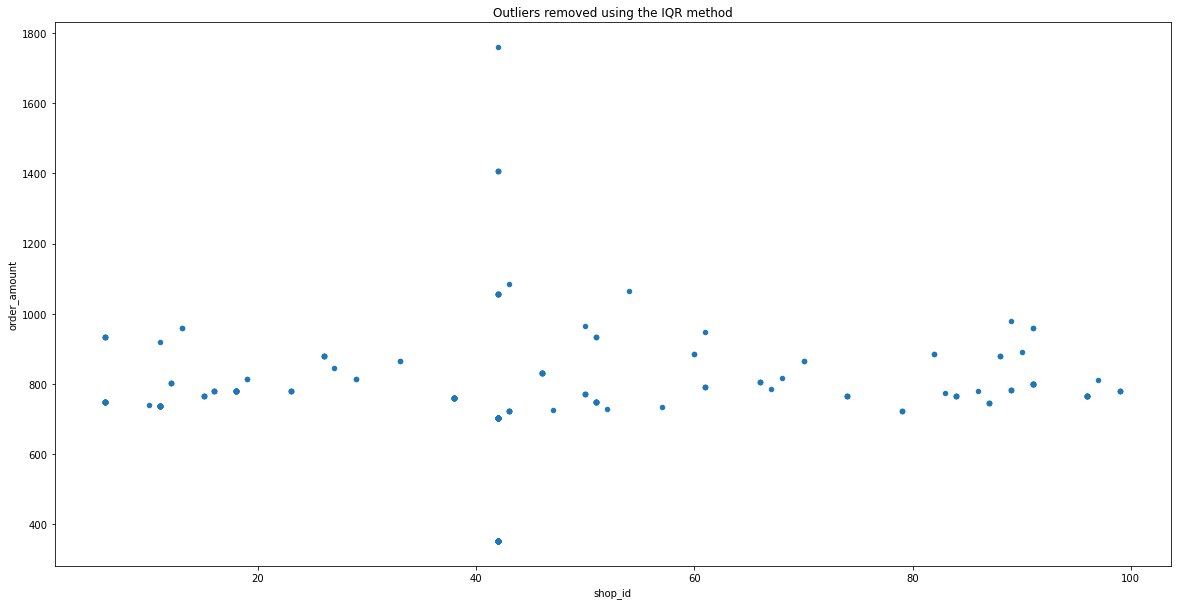

In [26]:
df_outliers=col2[((col2 >high_boundary)|(col2<low_boundary)).any(axis=1)]
df_outliers1=pd.merge(df_outliers,df,how='inner', left_on=['order_amount','total_items','Unit_Price'],right_on=['order_amount','total_items','Unit_Price'])
df_outliers1['created_at']=pd.to_datetime(df_outliers1['created_at'])
df_outliers1['time']=df_outliers1['created_at'].dt.time
ax1=df_outliers1.plot.scatter(x='shop_id', y='order_amount')
plt.title("Outliers removed using the IQR method")

There seems to be some low and high values betwen shop id_s 40 to 50. 
I will look into the top 10 order_amounts in this data set.

In [223]:
df_outliers1.sort_values('order_amount', ascending=False).set_index('shop_id').head(10)

,order_amount,total_items,Unit_Price,order_id,user_id,payment_method,created_at,time
shop_id,,,,,,,,
42,1760,5,352.0,1365,797,cash,2017-03-10 06:28:21,06:28:21
42,1408,4,352.0,1368,926,cash,2017-03-13 02:38:34,02:38:34
42,1408,4,352.0,1472,907,debit,2017-03-12 23:00:22,23:00:22
42,1408,4,352.0,1368,926,cash,2017-03-13 02:38:34,02:38:34
42,1408,4,352.0,1472,907,debit,2017-03-12 23:00:22,23:00:22
43,1086,6,181.0,3539,830,debit,2017-03-17 19:56:29,19:56:29
54,1064,8,133.0,4142,733,debit,2017-03-07 17:05:18,17:05:18
42,1056,3,352.0,2988,819,cash,2017-03-03 09:09:25,09:09:25
42,1056,3,352.0,939,808,credit_card,2017-03-13 23:43:45,23:43:45


There are about 5 orders above 1400 and they are from store 42.
The unit price in the store is 352 so that explains the low data pointon the graph as well.
and it seems this practice had some high volume sales between the 10th to the 13th of March.
Maybe the store had a sale or promotion going on. We will need more data around the store's marketing and discounts
to be able to know why there are more items in those orders.

The orders also happened at similar times of the day. Two orders happened at 23:00:22 and another 2 orders at 02:38:34.
This could be useful for the Shopify's facebook Ads team.    

Store 54 had a sale that had 8 items. Because this only happened once,I would flag this order as an outlier.

# Q2: I would report the median for the data without outliers.The median is less sensitive to outliers and can be used to show the middle number for the revenue from a Shopify sneaker sale. If there are no outliers like high quantity orders or sneakers that have a high unit price data set,the median would be the same as the mean. Here the mean is higher than the median.

Text(0, 0.5, 'Value')

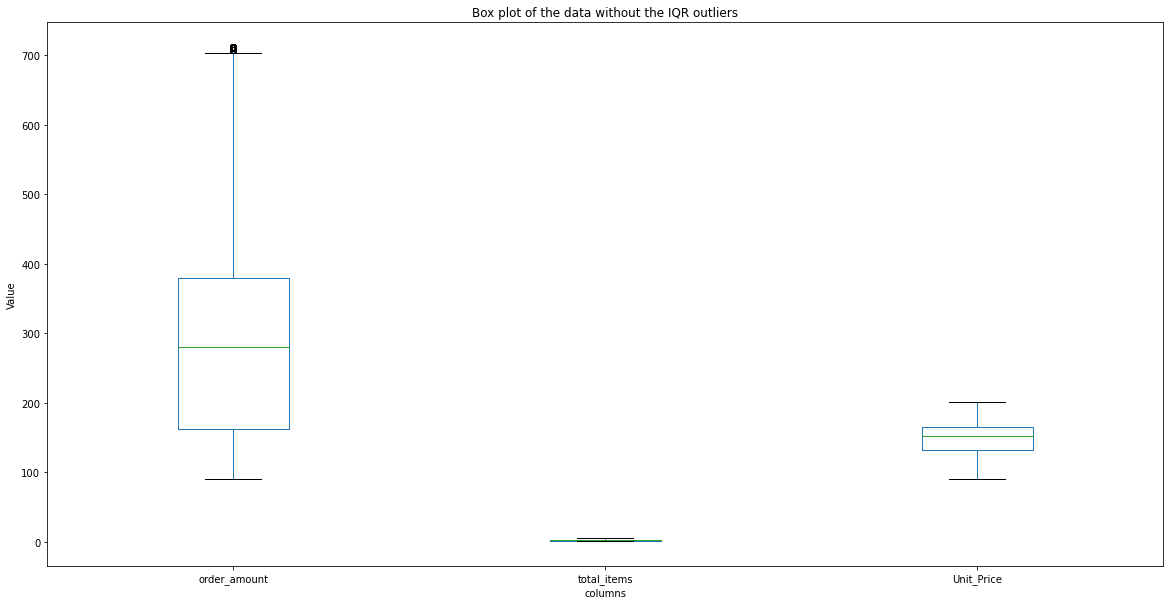

In [27]:
no_outliers.plot.box()
plt.title("Box plot of the data without the IQR outliers")
plt.xlabel("columns")
plt.ylabel("Value")

# Q3: To get this number, i would use describe() as i showed earlier on in this document. The median is the 50% value.
    

In [230]:
    no_outliers['order_amount'].describe()

count    4826.000000
mean      291.981765
std       142.650885
min        90.000000
25%       162.000000
50%       280.000000
75%       379.000000
max       712.000000
Name: order_amount, dtype: float64

The median for the order_amount is 280

If you have any questions, please feel free to message me on my LinkedIn provided in my Resume
which is attached to my application as well